# Supp Fig 2a

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

project_name = 'A1_12_global'
cmap='viridis'
pc_fea = np.load(f'result/{project_name}/merge.npy')
merge_position = pd.read_csv(f'result/{project_name}/colData.csv')
merge_row = merge_position['imagerow'].tolist()
merge_col = merge_position['imagecol'].tolist()

In [9]:
all_position = pd.read_csv(f'result/{project_name}/filtered_tissue_position_with_center.csv')
row_all = all_position['image_row'].tolist()
col_all = all_position['image_col'].tolist()
region_label = np.load(f'result/{project_name}/A1_region_label.npy')

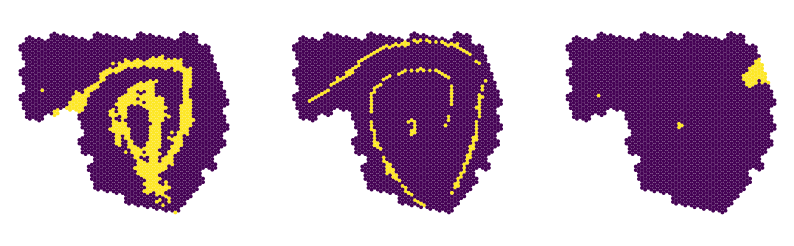

In [10]:
enhance_position = pd.read_csv(f'result/{project_name}/reordered_position_with_center.csv')
row_ = enhance_position['imagerow'].tolist()
col_ = enhance_position['imagecol'].tolist()
idx = (enhance_position['index']-1).tolist()


filtered_label = region_label[idx]
fig = plt.figure(figsize=(10, 3), dpi=100)
count = 0
for i in [2, 3, 6]:
    count += 1
    ax = fig.add_subplot(1, 3, count)
    plt.axis("equal")
    plt.axis('off')
    plt.scatter(row_, col_, s=3,
                marker = 'o',
                c=filtered_label==i,
                cmap=cmap,
                )

# plt.savefig(f'../paper/NNfig/Fig2/Merge.pdf')
plt.show()

In [11]:
def slicing(array, a=6, b=7):
    """
    get array sliced with q in (0, 1]
    Args:
        array: a numpy array with length of len.
        q: a ratio determining how many elements to remain.

    Returns: array[ : int(q*len)]
    """
    reult = []
    for i in range(len(array)//b):
        slice_ = array[i*b:i*b+b]
        new_array = slice_[:a]
        reult += new_array.tolist()
    return np.array(reult)


row_q = slicing(np.array(row_))
col_q = slicing(np.array(col_))
label_q = slicing(filtered_label)

In [11]:
np.save(f'result/{project_name}/reordered_label.npy', filtered_label)

In [14]:
from postprocess import Numpy2Image as n2i
from postprocess import Result2Csv as r2c
import numpy as np
import pandas as pd

project_name = 'A1_12_global'
exp_name = 'svae_A1_nn9_n'
folder_name = f'result/{project_name}/{exp_name}'

In [15]:
grid = 7

fea = np.load(f'{folder_name}/infer_subspot.npy')
mean_fea = np.zeros((fea.shape[0]//grid, fea.shape[1]))
spot_num = fea.shape[0]//grid
for i in range(spot_num):
    fea_sub = fea[i * grid :(i + 1) * grid]
    mean_fea[i] = np.mean(fea_sub, axis=0)
    
np.save(f'result/{project_name}/{exp_name}_pc.npy', fea)
pd.DataFrame(fea).to_csv(f'result/{project_name}/{exp_name}_pc.csv')

In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr
from scipy.stats import wasserstein_distance as WD
import seaborn as sns
import matplotlib.pyplot as plt

project_name = 'A1_12_global'

data = pd.read_csv(f'result/{project_name}/reordered_count.csv', index_col=0)
data_spatial_1 = pd.read_csv(f'result/{project_name}/bayesspace_count_2.csv', index_col=0)
data_spatial_2 = pd.read_csv(f'result/{project_name}/interpolation_linear.csv')
data_spatial_3 = pd.read_csv(f'result/{project_name}/gp.csv')

data_cross_0 = pd.read_csv(f'result/{project_name}/a1_XFuse_SR.csv', index_col=0)
data_cross_1 = pd.read_csv(f'result/{project_name}/g2p_linear.csv')
data_cross_2 = pd.read_csv(f'result/{project_name}/g2p_gaussian_process_2.csv')
data_cross_3 = pd.read_csv(f'result/{project_name}/g2p_mlp_32.csv')

data_ours = pd.read_csv(f'result/{project_name}/{exp_name}_pc.csv', index_col=0)
data_control = pd.read_csv(f'result/{project_name}/hvg_merge.csv', index_col=0)
position = pd.read_csv(f'result/{project_name}/reordered_position_with_center.csv')

row = np.array(position['imagerow'].tolist())
col = np.array(position['imagecol'].tolist())

r_position = pd.read_csv(f'result/{project_name }/colData.csv')

row_r = r_position['imagerow']
col_r = r_position['imagecol']

width = 3 / 2 * np.mean(row)
height = 3 / 2 * np.mean(col)


genes = pd.read_csv(f'result/{project_name }/HVG_9.csv')['Gene'].tolist()
print(genes)

['MT1G', 'FABP1', 'EPCAM', 'CNN1', 'MYH11', 'TAGLN', 'PTPRC', 'HLA-DRA', 'CD74']


In [22]:
data = data.clip(lower=0)
data_spatial_1 = data_spatial_1.clip(lower=0)
data_spatial_2 = data_spatial_2.clip(lower=0)
data_spatial_3 = data_spatial_3.clip(lower=0)
data_cross_0 = data_cross_0.clip(lower=0)
data_cross_1 = data_cross_1.clip(lower=0)
data_cross_2 = data_cross_2.clip(lower=0)
data_cross_3 = data_cross_3.clip(lower=0)
data_ours = data_ours.clip(lower=0)
data_control = data_control.clip(lower=0)

In [23]:
data_ours.columns = genes
data_ours

,MT1G,FABP1,EPCAM,CNN1,MYH11,TAGLN,PTPRC,HLA-DRA,CD74
0,0.774126,16.997051,8.910179,0.137457,0.385208,1.137114,0.010015,0.121250,0.348273
1,0.700851,18.401894,7.384587,0.164974,0.526157,1.444880,0.013702,0.166403,0.478912
2,0.635226,13.392070,5.286686,0.143873,0.352811,1.318174,0.014213,0.129488,0.413038
3,0.942876,10.607399,3.946824,0.222212,0.492285,1.560791,0.024949,0.194742,0.532598
4,1.043598,16.884443,7.249823,0.177090,0.417271,1.631515,0.010801,0.157767,0.516006
...,...,...,...,...,...,...,...,...,...
2417,0.297157,1.107499,0.796615,0.158058,0.307243,1.368416,0.049693,0.163743,0.443953
2418,0.282553,2.057682,0.905653,0.048053,0.116632,1.158969,0.026101,0.158326,0.481752
2419,0.243304,1.507515,0.544236,0.156278,0.381507,2.798677,0.026793,0.101342,0.387715
2420,0.104584,2.012591,0.727571,0.075887,0.220560,1.107079,0.022633,0.108796,0.345731


In [24]:
data_ours.to_csv(f'result/{project_name}/ours.csv')

In [25]:
def slicing(array, a=6, b=7):
    """
    get array sliced with q in (0, 1]
    Args:
        array: a numpy array with length of len.
        q: a ratio determining how many elements to remain.

    Returns: array[ : int(q*len)]
    """
    reult = []
    for i in range(len(array)//b):
        slice_ = array[i*b:i*b+b]
        new_array = slice_[:a]
        reult += new_array.tolist()
    return reult


row_q = slicing(row)
col_q = slicing(col)

In [26]:
## reorder bayesspace

index = data_spatial_1.index
index_num = []
for idx in index:
    index_num.append(float(idx.split('_')[-1]))

data_spatial_1['order'] = index_num
data_spatial_1_sorted = data_spatial_1.sort_values(by="order",ascending=True)
data_spatial_1_sorted.to_csv(f'result/{project_name}/bayesspace_sorted.csv')

In [30]:
row_number = 1


pearson_ours_list = []
spearman_ours_list = []

pearson_spatial_1_list = []
spearman_spatial_1_list = []
pearson_spatial_2_list = []
spearman_spatial_2_list = []
pearson_spatial_3_list = []
spearman_spatial_3_list = []

pearson_cross_0_list = []
spearman_cross_0_list = []
pearson_cross_1_list = []
spearman_cross_1_list = []
pearson_cross_2_list = []
spearman_cross_2_list = []
pearson_cross_3_list = []
spearman_cross_3_list = []

mse_ours_list = []
mse_spatial_1_list = []
mse_spatial_2_list = []
mse_spatial_3_list = []
mse_cross_0_list = []
mse_cross_1_list = []
mse_cross_2_list = []
mse_cross_3_list = []

wd_ours_list = []
wd_spatial_1_list = []
wd_spatial_2_list = []
wd_spatial_3_list = []
wd_cross_0_list = []
wd_cross_1_list = []
wd_cross_2_list = []
wd_cross_3_list = []

for i in range(len(genes)):
    gene = genes[i]

    exp_gt = data[gene]
    print(f'------------------{gene}-------------------------')
    exp_gt_q = slicing(exp_gt)
    exp_control = data_control[gene]
    exp_ours = data_ours[gene]

    exp_spatial_1 = data_spatial_1_sorted[gene]
    exp_spatial_2 = data_spatial_2[gene]
    exp_spatial_3 = data_spatial_3[gene]
    
    exp_cross_0 = data_cross_0[gene]
    exp_cross_1 = data_cross_1[gene]
    exp_cross_2 = data_cross_2[gene]
    exp_cross_3 = data_cross_3[gene]

    # pearson
    pearson_ours, _ = pearsonr(exp_gt, exp_ours)
    pearson_spatial_1, _ = pearsonr(exp_gt_q, exp_spatial_1)
    pearson_spatial_2, _ = pearsonr(exp_gt, exp_spatial_2)
    pearson_spatial_3, _ = pearsonr(exp_gt, exp_spatial_3)
    
    pearson_cross_0, _ = pearsonr(exp_gt, exp_cross_0)
    pearson_cross_1, _ = pearsonr(exp_gt, exp_cross_1)
    pearson_cross_2, _ = pearsonr(exp_gt, exp_cross_2)
    pearson_cross_3, _ = pearsonr(exp_gt, exp_cross_3)

    pearson_ours_list.append(pearson_ours)
    pearson_spatial_1_list.append(pearson_spatial_1)
    pearson_spatial_2_list.append(pearson_spatial_2)
    pearson_spatial_3_list.append(pearson_spatial_3)
    pearson_cross_0_list.append(pearson_cross_0)
    pearson_cross_1_list.append(pearson_cross_1)
    pearson_cross_2_list.append(pearson_cross_2)
    pearson_cross_3_list.append(pearson_cross_3)
    print(pearson_spatial_1, pearson_cross_0, pearson_ours)

    # mse
    mse_ours = mean_squared_error(exp_gt, exp_ours)
    mse_s_1 = mean_squared_error(exp_gt_q, exp_spatial_1)
    mse_s_2 = mean_squared_error(exp_gt, exp_spatial_2)
    mse_s_3 = mean_squared_error(exp_gt, exp_spatial_3)
    mse_c_0 = mean_squared_error(exp_gt, exp_cross_0)
    mse_c_1 = mean_squared_error(exp_gt, exp_cross_1)
    mse_c_2 = mean_squared_error(exp_gt, exp_cross_2)
    mse_c_3 = mean_squared_error(exp_gt, exp_cross_3)

    mse_ours_list.append(mse_ours)
    mse_spatial_1_list.append(mse_s_1)
    mse_spatial_2_list.append(mse_s_2)
    mse_spatial_3_list.append(mse_s_3)
    mse_cross_0_list.append(mse_c_0)
    mse_cross_1_list.append(mse_c_1)
    mse_cross_2_list.append(mse_c_2)
    mse_cross_3_list.append(mse_c_3)
    
print((np.median(pearson_ours_list) - np.median(pearson_spatial_1_list))/np.median(np.median(pearson_spatial_1_list)))
print((np.median(mse_ours_list) - np.median(mse_spatial_1_list))/np.median(np.median(mse_ours_list)))

------------------MT1G-------------------------
0.5547431823965729 0.2309869440063426 0.5518183583546189
------------------FABP1-------------------------
0.6897595482654604 0.3422283446316031 0.7315790648609473
------------------EPCAM-------------------------
0.6349686893177717 0.3810730042285923 0.6654398618093332
------------------CNN1-------------------------
0.5675593359191603 0.5964088655166229 0.7003091744599994
------------------MYH11-------------------------
0.5552856124575081 0.6121119903601118 0.7430169909063553
------------------TAGLN-------------------------
0.633721713645551 0.6558015777349955 0.7769725441353637
------------------PTPRC-------------------------
0.4616745229896936 0.08911556339197285 0.6700147016555655
------------------HLA-DRA-------------------------
0.6202507629099777 0.16038438919655024 0.649442810052795
------------------CD74-------------------------
0.7334825721347652 0.17124006220473836 0.7680570292871831
0.12907426534135719
-0.17620403601273965


# Supp Fig 2b

------------------MT1G-------------------------
------------------FABP1-------------------------
------------------EPCAM-------------------------
------------------CNN1-------------------------
------------------MYH11-------------------------
------------------TAGLN-------------------------
------------------PTPRC-------------------------
------------------HLA-DRA-------------------------
------------------CD74-------------------------


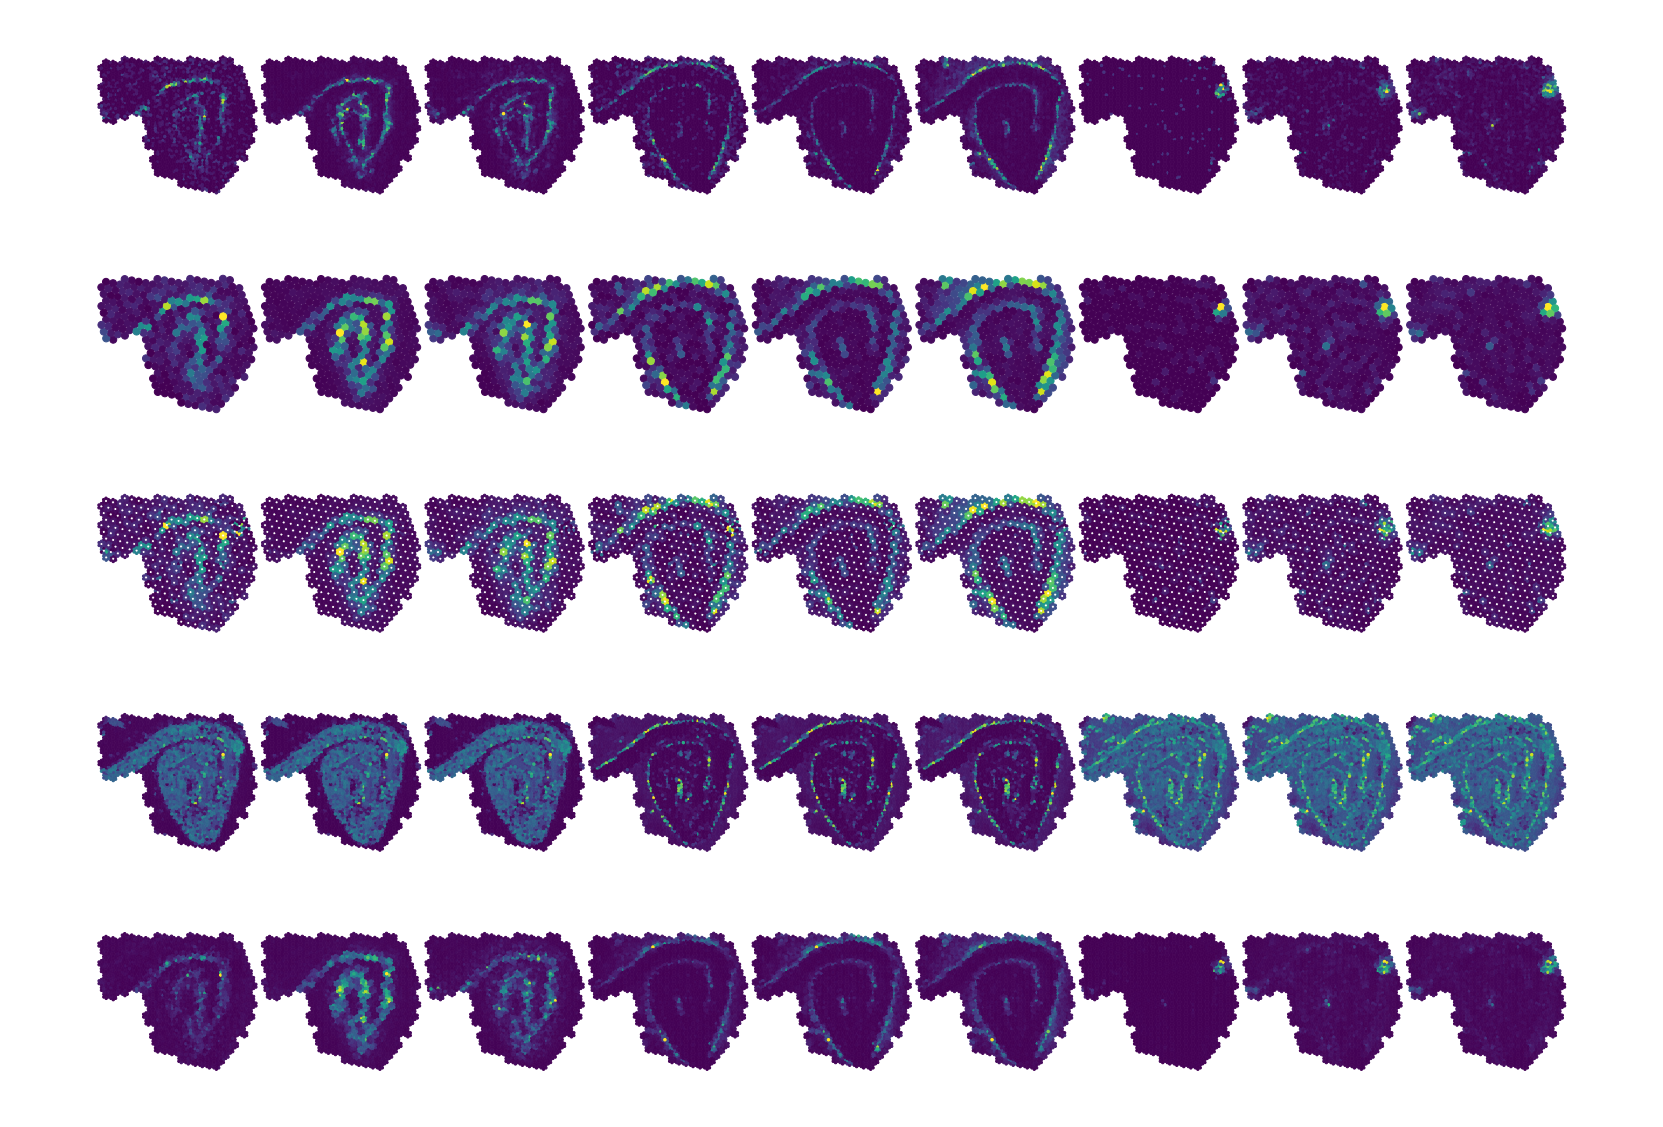

In [37]:
f_, ax_ = plt.subplots(figsize=(24, 16))
plt.axis("equal")
cmap='viridis'
for i in range(len(genes)):
    gene = genes[i]

    exp_gt = data[gene]
    print(f'------------------{gene}-------------------------')
    exp_gt_q = slicing(exp_gt)
    exp_control = data_control[gene]
    exp_ours = data_ours[gene]

    exp_spatial_1 = data_spatial_1_sorted[gene]
    exp_spatial_2 = data_spatial_2[gene]
    exp_spatial_3 = data_spatial_3[gene]
    
    exp_cross_0 = data_cross_0[gene]
    exp_cross_1 = data_cross_1[gene]
    exp_cross_2 = data_cross_2[gene]
    exp_cross_3 = data_cross_3[gene]


    size = 6
    size_ = 50
    img_00 = plt.scatter(i * width + row, -0*height + col, s=size,
                        marker='o',
                        c=exp_gt,
                        cmap=cmap, vmin=0)

    img_10 = plt.scatter(i * width + row_r, -1*height + col_r, s=size_,
                        marker='o',
                        c=exp_control,
                        cmap=cmap, vmin=0)

    img_03 = plt.scatter(i * width + row_q, -2*height + col_q, s=size,
                        marker='o',
                        c=7*exp_spatial_1,
                        cmap=cmap, vmin=0)
    
    img_01 = plt.scatter(i * width + row, -3*height + col, s=size,
                        marker='o',
                        c=exp_cross_0,
                        cmap=cmap, vmin=0)
    

    img_20 = plt.scatter(i * width + row, -4*height + col, s=size,
                    marker='o',
                    c=exp_ours,
                        cmap=cmap, vmin=0)

plt.tight_layout()
plt.axis('off')
plt.savefig(f'../paper/NNfig/Fig2/supp/{project_name}_{exp_name}_all.png', pad_inches=0)
plt.show()

# Fig 2c

------------------MT1G-------------------------
------------------CNN1-------------------------
------------------HLA-DRA-------------------------


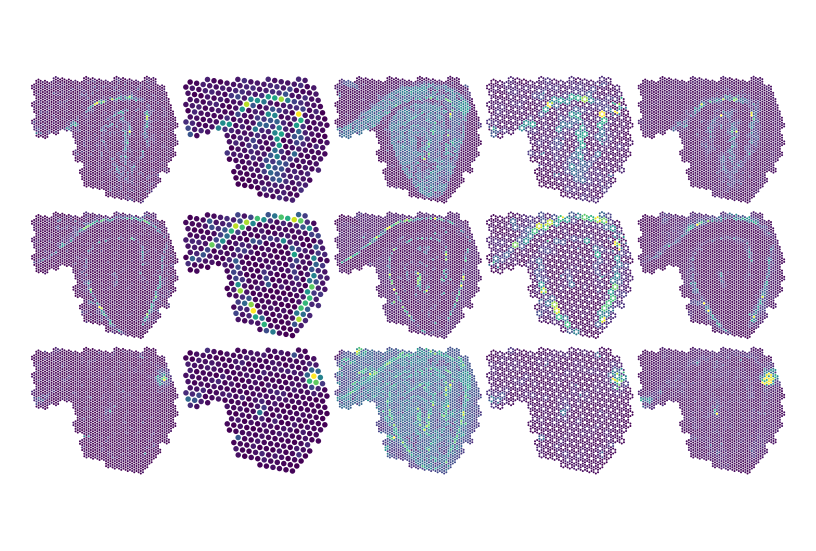

In [16]:
width = 3 / 2 * np.mean(row)
height = np.mean(col)

f_, ax_ = plt.subplots(figsize=(12, 8))
plt.axis("equal")
genes_roi = ['MT1G', 'CNN1', 'HLA-DRA']

def step_norm_t(array, t=0):
    norm_array = min_max_norm(array)
    return np.array([int(l > t) for l in norm_array])

vmax_list = [12, 12, 8]
for i in range(len(genes_roi)):
    gene = genes_roi[i]

    exp_gt = data[gene]
    print(f'------------------{gene}-------------------------')
    exp_gt_q = slicing(exp_gt)
    exp_control = data_control[gene]
    exp_ours = data_ours[gene]

    exp_spatial_1 = data_spatial_1_sorted[gene]
    exp_spatial_2 = data_spatial_2[gene]
    exp_spatial_3 = data_spatial_3[gene]
    
    exp_cross_0 = data_cross_0[gene]
    exp_cross_1 = data_cross_1[gene]
    exp_cross_2 = data_cross_2[gene]
    exp_cross_3 = data_cross_3[gene]


    size = 4
    size_ = 30
#     img_00 = plt.scatter(0 * width + row, -i*height + col, s=size,
#                         marker='o',
#                         c=exp_gt,
#                         cmap=cmap, vmin=0.15*np.max(exp_gt))

#     img_10 = plt.scatter(1 * width + row_r, -i*height + col_r, s=size_,
#                         marker='o',
#                         c=exp_control,
#                         cmap=cmap, vmin=0.15*np.max(exp_control))

#     img_01 = plt.scatter(2 * width + row, -i*height + col, s=size,
#                         marker='o',
#                         c=exp_cross_0,
#                         cmap=cmap, vmin=0.15*np.max(exp_cross_0))

#     img_03 = plt.scatter(3 * width + row_q, -i*height + col_q, s=size,
#                         marker='o',
#                         c=7*exp_spatial_1,
#                         cmap=cmap, vmin=0.15*np.max(exp_spatial_1))

#     img_20 = plt.scatter(4 * width + row, -i*height + col, s=size,
#                     marker='o',
#                     c=exp_ours,
#                         cmap=cmap, vmin=0.15*np.max(exp_ours), vmax=vmax_list[i])
    
    
    img_00 = plt.scatter(0 * width + row, -i*height + col, s=size,
                        marker='o',
                        c=exp_gt,
                         linewidths=0,
                        cmap=cmap, vmin=0)

    img_10 = plt.scatter(1 * width + row_r, -i*height + col_r, s=size_,
                        marker='o',
                        c=exp_control,
                         linewidths=0,
                        cmap=cmap, vmin=0)

    img_01 = plt.scatter(2 * width + row, -i*height + col, s=size,
                        marker='o',
                        c=exp_cross_0,
                         linewidths=0,
                        cmap=cmap, vmin=0)

    img_03 = plt.scatter(3 * width + row_q, -i*height + col_q, s=size,
                        marker='o',
                        c=7*exp_spatial_1,
                         linewidths=0,
                        cmap=cmap, vmin=0)

    img_20 = plt.scatter(4 * width + row, -i*height + col, s=size,
                    marker='o',
                    c=exp_ours,
                         linewidths=0,
                        cmap=cmap, vmin=0, vmax=vmax_list[i])

plt.tight_layout()
plt.axis('off')
plt.savefig(f'../paper/NNfig/Fig2/{project_name}_{exp_name}_ROI.png', pad_inches=0)
plt.savefig(f'../paper/NNfig/Fig2/{project_name}_{exp_name}_ROI_3.pdf', pad_inches=0)
plt.show()

# Fig 2d

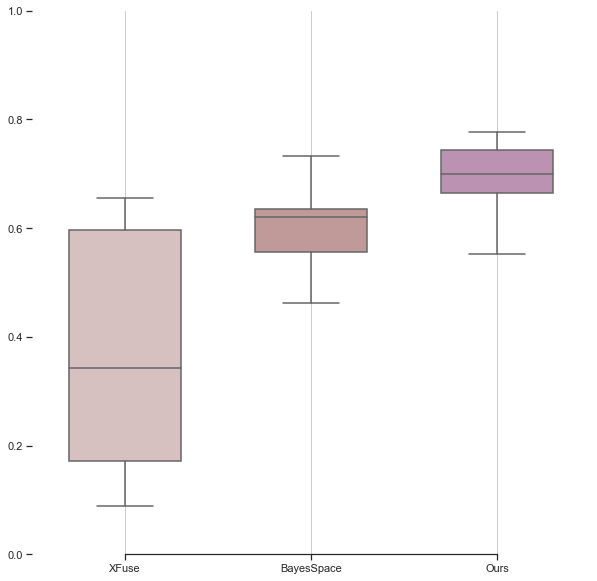

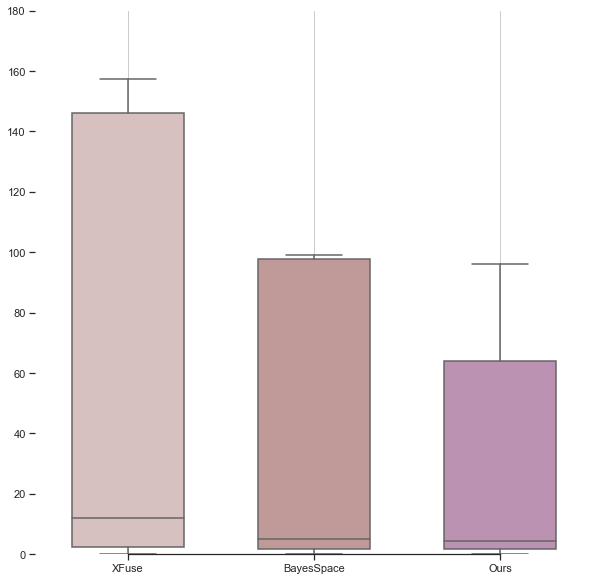

In [44]:
df_pearson = {
    'method':
    ['XFuse'] * len(pearson_cross_0_list)
    +['BayesSpace'] * len(pearson_spatial_1_list)
    + ['Ours'] * len(pearson_ours_list),
    'value': pearson_cross_0_list + pearson_spatial_1_list + pearson_ours_list,
}

df_mse = {
    'method': 
    ['XFuse'] * len(mse_cross_0_list)
    + ['BayesSpace'] * len(mse_spatial_1_list)
    + ['Ours'] * len(mse_ours_list),
    'value': mse_cross_0_list + mse_spatial_1_list + mse_ours_list,
}

df_log_mse = {
    'method': 
    ['XFuse'] * len(mse_cross_0_list)
    + ['BayesSpace'] * len(mse_spatial_1_list)
    + ['Ours'] * len(mse_ours_list),
    'value': np.log(df_mse['value']),
}


color_list = [[219,189,188], [198, 148, 146], [194, 139, 182]]
color_x = [f'#{hex(i[0])[2:]}{hex(i[1])[2:]}{hex(i[2])[2:]}' for i in color_list]


sns.set_theme(style="ticks")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="method", y="value", data=df_pearson,
            width=.6, palette=color_x)
# Tweak the visual presentation
ax.set(ylim=(0, 1))
ax.xaxis.grid(True)
sns.despine(trim=True, left=True)
plt.savefig(f'../paper/NNfig/Fig2/{project_name}_pearson.pdf')
plt.show()

sns.set_theme(style="ticks")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x="method", y="value", data=df_mse,
            width=.6, palette=color_x)
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylim=(0, 180))
sns.despine(trim=True, left=True)
plt.savefig(f'../paper/NNfig/Fig2/{project_name}_mse.pdf')
plt.show()


In [18]:
def slicing_df(df, a=6, b=7):
    """
    get array sliced with q in (0, 1]
    Args:
        array: a numpy array with length of len.
        q: a ratio determining how many elements to remain.

    Returns: array[ : int(q*len)]
    """
    array = df.values
    key = df.keys()
    reult = np.zeros((array.shape[0]*a//b, array.shape[1]))
    for i in range(len(array)//b):
        slice_ = array[i*b:i*b+b]
        new_array = slice_[:a]
        reult[i*a:i*a+a] = new_array
    reult_df = pd.DataFrame(reult, columns=key)
    return reult_df


data_q = slicing_df(data)
data_q

,MT1G,FABP1,EPCAM,CNN1,MYH11,TAGLN,PTPRC,HLA-DRA,CD74
0,1.0,15.0,15.0,0.0,2.0,2.0,0.0,0.0,2.0
1,1.0,12.0,8.0,0.0,0.0,2.0,0.0,0.0,0.0
2,1.0,18.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,16.0,5.0,2.0,0.0,1.0,0.0,0.0,0.0
4,2.0,24.0,5.0,0.0,1.0,1.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...
2071,2.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
2072,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2073,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2074,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Supp Fig 3

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def min_max_norm(exp):
    return (exp - np.min(exp))/(np.max(exp) - np.min(exp))

In [13]:
data_0 = pd.read_csv(f'result/{project_name}/reordered_count.csv', index_col=0).clip(lower=0)
data_1 = pd.read_csv(f'result/{project_name}/a1_XFuse_SR.csv', index_col=0).clip(lower=0)
data_2 = pd.read_csv(f'result/{project_name}/bayesspace_sorted.csv', index_col=0).clip(lower=0)
data_3 = pd.read_csv(f'result/{project_name}/ours.csv').clip(lower=0)

In [14]:
from scipy.stats import kstest

def plot_diff_boxplot_all(data_list, data_file, target_region, genes, filter_out, norm=False, vmax=1):
    sns.set_theme(style="ticks")
    f, ax = plt.subplots(figsize=(20, 7))
    df_exp = {
        'value':[],
        'method':[],
        'region':[]
    }
    for i in range(len(data_list)):
        hr_expression = data_list[i]
        label = np.load(f'result/{project_name}/reordered_label.npy')
        gt_label_ = label == target_region
        f_gt_label_= label != target_region
        if filter_out[i]:
            gt_label_ = slicing(gt_label_, a=6, b=7)
            f_gt_label_ = slicing(f_gt_label_, a=6, b=7)
        hr_expression['gt_label'] = gt_label_
        j = 0
        for g in genes:
            j += 1
            exp_0 = hr_expression[g].tolist()
            if norm:
                exp_0 = min_max_norm(hr_expression[g]).tolist()
            
            
            exp_in = np.array(exp_0)[gt_label_]
            exp_out = np.array(exp_0)[f_gt_label_]
            
            test_stat = kstest(exp_in, exp_out)
            print(f'{data_file[i]} {g} KS test: {test_stat}')
            
            df_exp['value'] += exp_0
            df_exp['method'] += [data_file[i]] * len(exp_0)
            df_exp['region'] += hr_expression['gt_label'].tolist()
    df_exp = pd.DataFrame(df_exp)
    sns.boxplot(data=df_exp, x="method", y="value", hue="region", linewidth=1)
    ax.set(ylim=(0, vmax))
    sns.despine(trim=True, left=True)
    plt.savefig(f'../paper/NNfig/Fig2/supp/A1_inner_outer_{g}_{target_region}.pdf')
    plt.show()
    return 0

xfuse MT1G KS test: KstestResult(statistic=0.3945415871101732, pvalue=1.6021769195851518e-55, statistic_location=0.5045754, statistic_sign=-1)
bs MT1G KS test: KstestResult(statistic=0.57241856455857, pvalue=3.205594177775018e-104, statistic_location=0.7142452, statistic_sign=-1)
stCAVE MT1G KS test: KstestResult(statistic=0.6649227045858038, pvalue=7.02717750717292e-168, statistic_location=0.6213355, statistic_sign=-1)


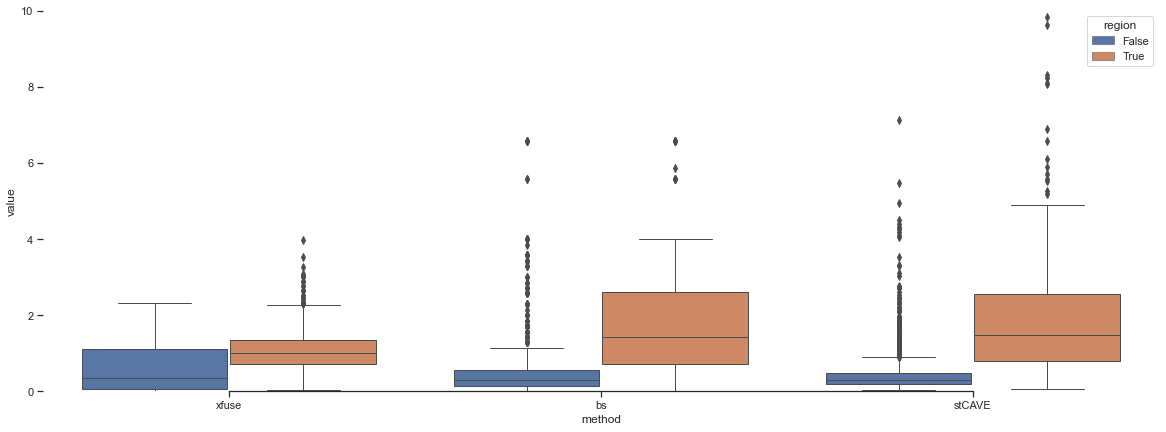

xfuse FABP1 KS test: KstestResult(statistic=0.3946023012762536, pvalue=1.5386325652233457e-55, statistic_location=14.46052, statistic_sign=-1)
bs FABP1 KS test: KstestResult(statistic=0.7760241811087923, pvalue=7.817479835169056e-207, statistic_location=7.976943493, statistic_sign=-1)
stCAVE FABP1 KS test: KstestResult(statistic=0.767043931933139, pvalue=1.8840834329843338e-233, statistic_location=8.300776, statistic_sign=-1)


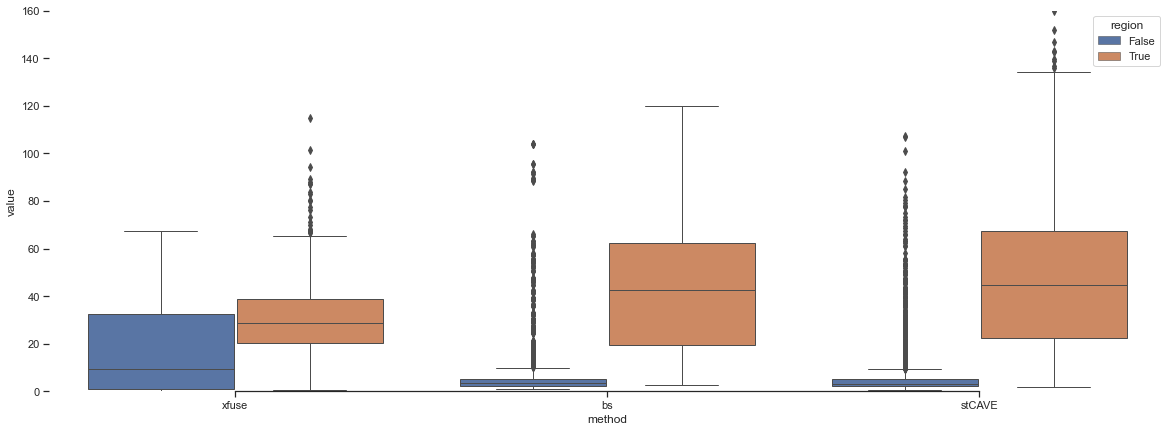

xfuse EPCAM KS test: KstestResult(statistic=0.3951215120758383, pvalue=1.0900045107683704e-55, statistic_location=5.1420584, statistic_sign=-1)
bs EPCAM KS test: KstestResult(statistic=0.6600523999637057, pvalue=2.5883329134238952e-142, statistic_location=5.719887733, statistic_sign=-1)
stCAVE EPCAM KS test: KstestResult(statistic=0.6857518507352695, pvalue=5.915355003643986e-180, statistic_location=6.6879845, statistic_sign=-1)


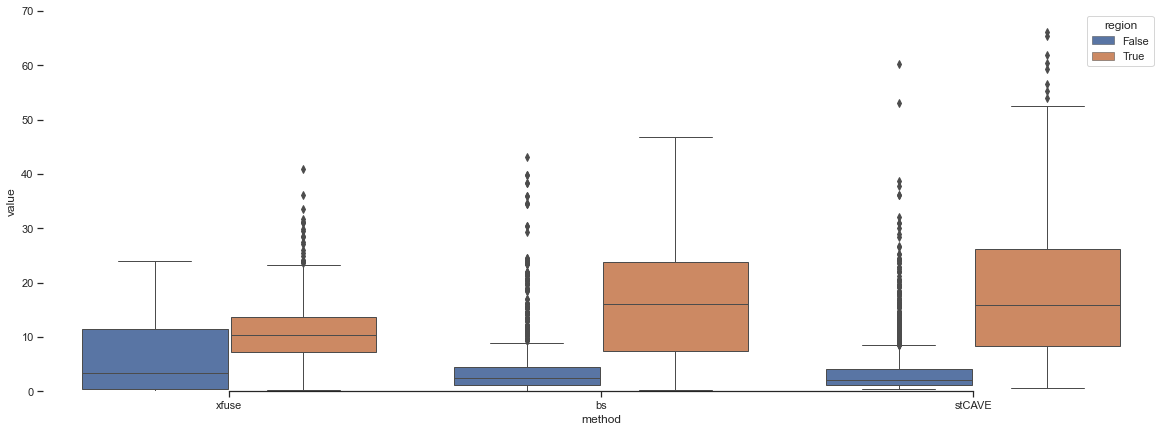

0

In [15]:
data_list_ = [data_1, data_2, data_3]
flag_list_ = [False, True, False]
data_file_ = ['xfuse', 'bs', 'stCAVE']

plot_diff_boxplot_all(data_list_, data_file_, 2, ['MT1G'], flag_list_, vmax=10)
plot_diff_boxplot_all(data_list_, data_file_, 2, ['FABP1'], flag_list_, vmax=160)
plot_diff_boxplot_all(data_list_, data_file_, 2, ['EPCAM'], flag_list_, vmax=70)

xfuse CNN1 KS test: KstestResult(statistic=0.6734194122885129, pvalue=7.38331386102836e-73, statistic_location=0.1743454, statistic_sign=-1)
bs CNN1 KS test: KstestResult(statistic=0.6449283291388554, pvalue=4.239531174752208e-57, statistic_location=0.711939514, statistic_sign=-1)
stCAVE CNN1 KS test: KstestResult(statistic=0.7959149599287623, pvalue=6.105098416307144e-109, statistic_location=0.915594, statistic_sign=-1)


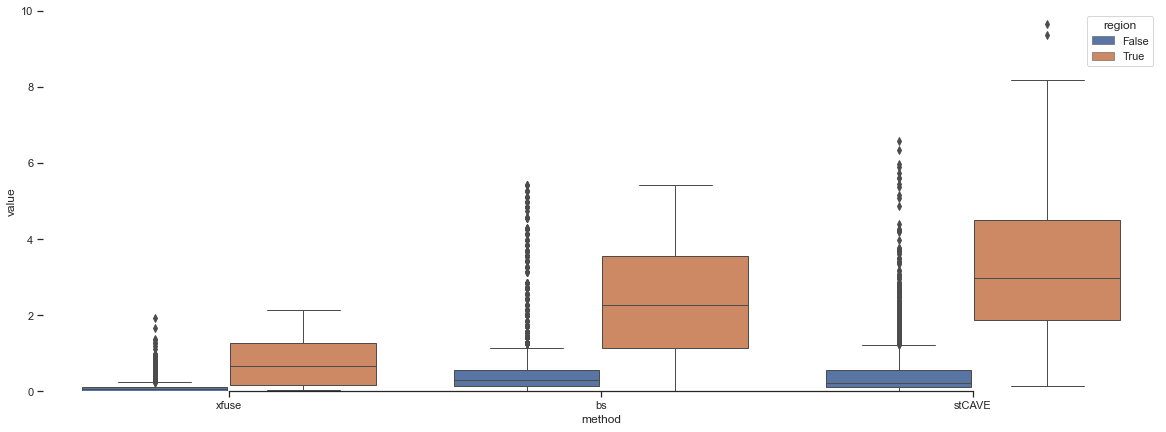

xfuse MYH11 KS test: KstestResult(statistic=0.6926252732129847, pvalue=9.609737711389993e-78, statistic_location=0.33604914, statistic_sign=-1)
bs MYH11 KS test: KstestResult(statistic=0.7406855235802604, pvalue=1.1080181228875735e-78, statistic_location=1.857015371, statistic_sign=-1)
stCAVE MYH11 KS test: KstestResult(statistic=0.7823909171861086, pvalue=2.7121227936302064e-104, statistic_location=3.1432831, statistic_sign=-1)


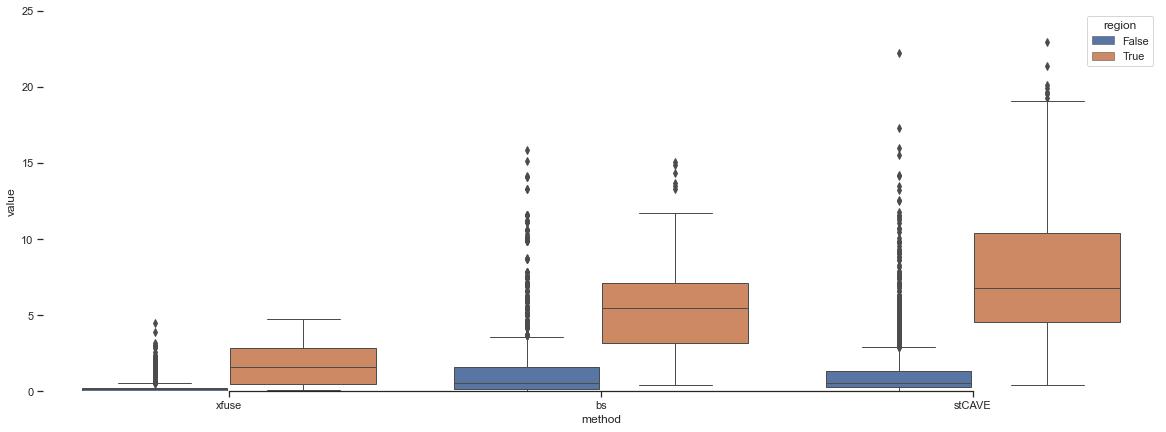

xfuse TAGLN KS test: KstestResult(statistic=0.7127873795839067, pvalue=3.9190702919085556e-83, statistic_location=1.5410049, statistic_sign=-1)
bs TAGLN KS test: KstestResult(statistic=0.6542291279133384, pvalue=5.9715082916677e-59, statistic_location=6.418440342, statistic_sign=-1)
stCAVE TAGLN KS test: KstestResult(statistic=0.7582419250384522, pvalue=1.907303437788043e-96, statistic_location=11.422983, statistic_sign=-1)


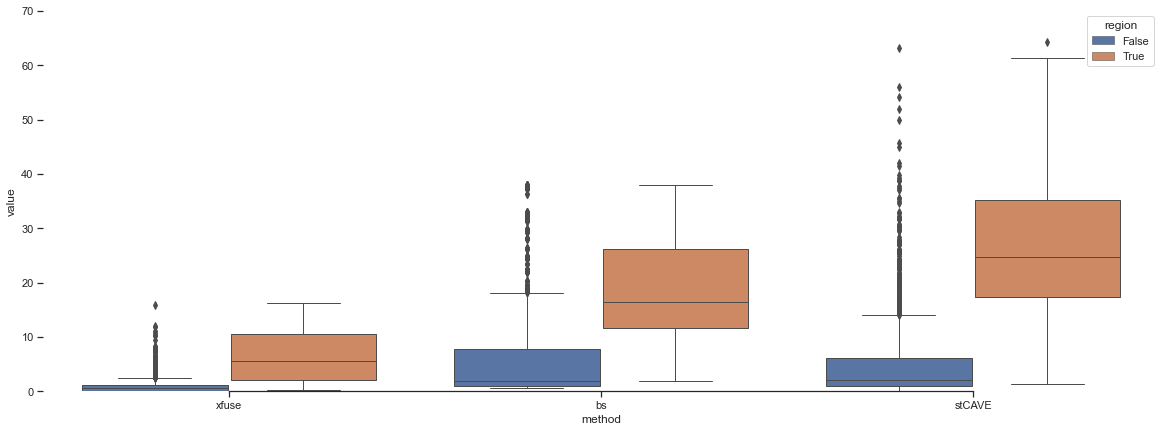

In [16]:
vmax_3 = [10, 25, 70]
gene_list = ['CNN1', 'MYH11', 'TAGLN']
for i in range(3):
    plot_diff_boxplot_all(data_list_, data_file_, 3, [gene_list[i]], flag_list_, vmax=vmax_3[i])

xfuse PTPRC KS test: KstestResult(statistic=0.32221754779600803, pvalue=0.0001401045470859816, statistic_location=0.010125871, statistic_sign=-1)
bs PTPRC KS test: KstestResult(statistic=0.5539783889980353, pvalue=7.801784927775799e-12, statistic_location=0.002023828, statistic_sign=-1)
stCAVE PTPRC KS test: KstestResult(statistic=0.9280605805637357, pvalue=1.2562000737398596e-49, statistic_location=0.07232699, statistic_sign=-1)


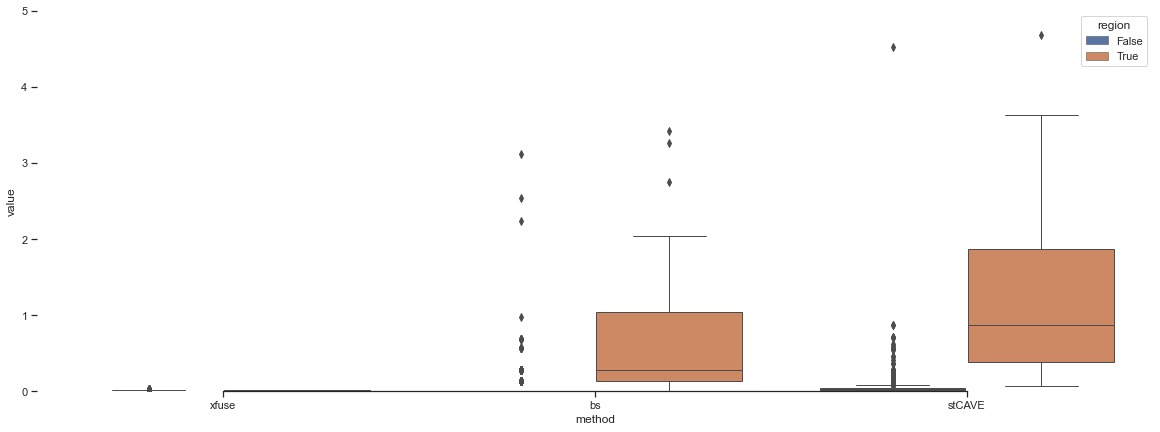

xfuse HLA-DRA KS test: KstestResult(statistic=0.31338288225120364, pvalue=0.0002364877331427228, statistic_location=0.083341956, statistic_sign=-1)
bs HLA-DRA KS test: KstestResult(statistic=0.8052554027504911, pvalue=7.879751745528547e-28, statistic_location=0.999816895, statistic_sign=-1)
stCAVE HLA-DRA KS test: KstestResult(statistic=0.8690412751834712, pvalue=6.287310244990474e-39, statistic_location=1.044962, statistic_sign=-1)


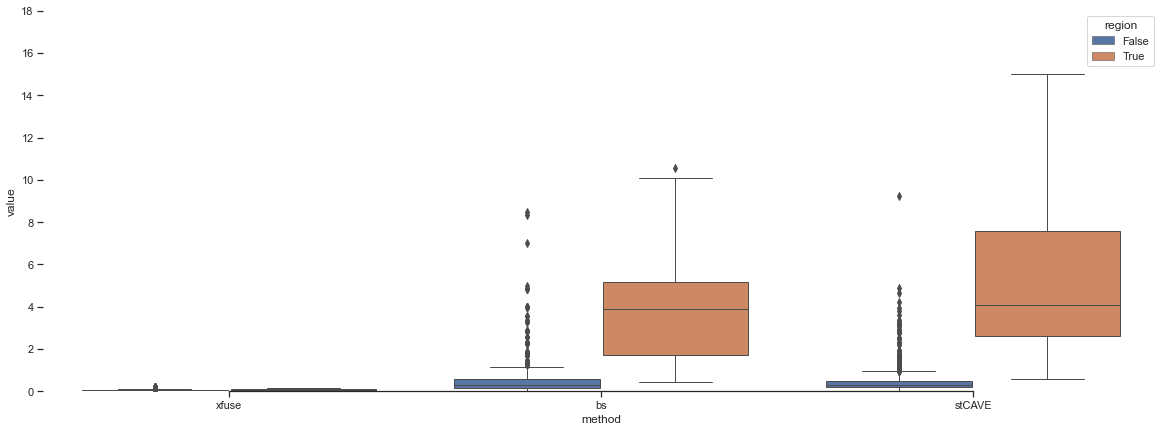

xfuse CD74 KS test: KstestResult(statistic=0.3189174028887954, pvalue=0.00017070467828931145, statistic_location=0.15292855, statistic_sign=-1)
bs CD74 KS test: KstestResult(statistic=0.8396365422396856, pvalue=3.166794943729942e-31, statistic_location=3.633121729, statistic_sign=-1)
stCAVE CD74 KS test: KstestResult(statistic=0.9148226055251718, pvalue=1.0198520707290879e-46, statistic_location=3.4147878, statistic_sign=-1)


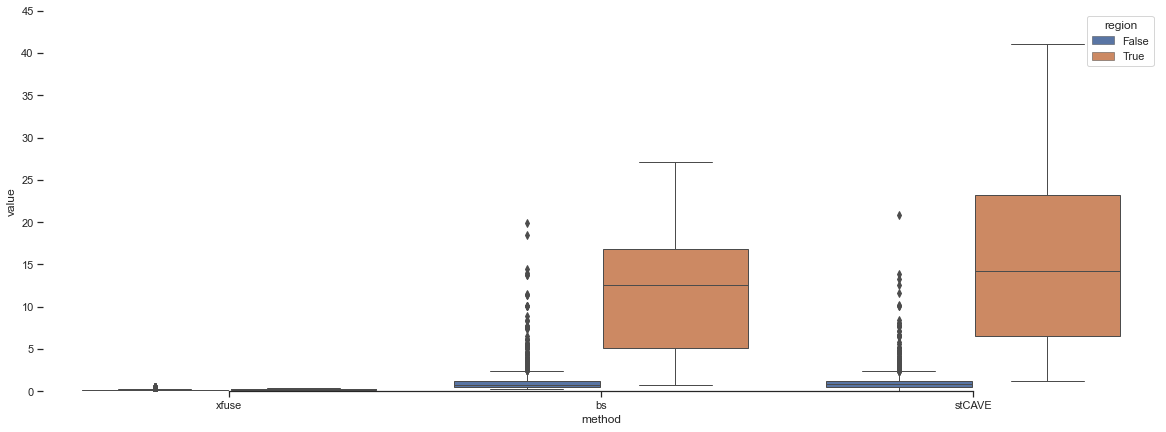

In [17]:
vmax_6 = [5, 18, 45]
gene_list = ['PTPRC', 'HLA-DRA', 'CD74']
for i in range(3):
    plot_diff_boxplot_all(data_list_, data_file_, 6, [gene_list[i]], flag_list_, vmax=vmax_6[i])

In [22]:
def plot_diff_ksd_all(data_list, data_file, target_region_list, genes, filter_out, norm=False, vmax=1):
    sns.set_theme(style="ticks")
    f, ax = plt.subplots(figsize=(20, 7))
    df_ksd = {
        'value':[],
        'method':[]
    }
    for i in range(len(data_list)):
        hr_expression = data_list[i]
        label = np.load(f'result/{project_name}/reordered_label.npy')
       
        j = 0
        for g in genes:
            gt_label_ = label == target_region_list[j]
            f_gt_label_= label != target_region_list[j]
            if filter_out[i]:
                gt_label_ = slicing(gt_label_, a=6, b=7)
                f_gt_label_ = slicing(f_gt_label_, a=6, b=7)
            hr_expression['gt_label'] = gt_label_
            
            
            j += 1
            exp_0 = hr_expression[g].tolist()
            if norm:
                exp_0 = min_max_norm(hr_expression[g]).tolist()
            
            exp_in = np.array(exp_0)[gt_label_]
            exp_out = np.array(exp_0)[f_gt_label_]
            
            test_stat = kstest(exp_in, exp_out)
            print(f'{data_file[i]} {g} KS test: {test_stat.statistic}')
            
            df_ksd['value'] += [test_stat.statistic]
            df_ksd['method'] += [data_file[i]]
    df_ksd = pd.DataFrame(df_ksd)
    
    bs = df_ksd['value'][9:18]
    ours = df_ksd['value'][18:27]

    print ((np.median(ours)-np.median(bs))/np.median(bs))
    
    sns.boxplot(data=df_ksd, x="method", y="value", linewidth=1)
    ax.set(ylim=(0, vmax))
    sns.despine(trim=True, left=True)
    plt.savefig(f'../paper/NNfig/Fig2/supp/A1_inner_outer_KSD_2.pdf')
    plt.show()
    return 0

# Fig 2e

xfuse MT1G KS test: 0.3945415871101732
xfuse FABP1 KS test: 0.3946023012762536
xfuse EPCAM KS test: 0.3951215120758383
xfuse CNN1 KS test: 0.6734194122885129
xfuse MYH11 KS test: 0.6926252732129847
xfuse TAGLN KS test: 0.7127873795839067
xfuse PTPRC KS test: 0.32221754779600803
xfuse HLA-DRA KS test: 0.31338288225120364
xfuse CD74 KS test: 0.3189174028887954
bs MT1G KS test: 0.57241856455857
bs FABP1 KS test: 0.7760241811087923
bs EPCAM KS test: 0.6600523999637057
bs CNN1 KS test: 0.6449283291388554
bs MYH11 KS test: 0.7406855235802604
bs TAGLN KS test: 0.6542291279133384
bs PTPRC KS test: 0.5539783889980353
bs HLA-DRA KS test: 0.8052554027504911
bs CD74 KS test: 0.8396365422396856
stCAVE MT1G KS test: 0.6649227045858038
stCAVE FABP1 KS test: 0.767043931933139
stCAVE EPCAM KS test: 0.6857518507352695
stCAVE CNN1 KS test: 0.7959149599287623
stCAVE MYH11 KS test: 0.7823909171861086
stCAVE TAGLN KS test: 0.7582419250384522
stCAVE PTPRC KS test: 0.9280605805637357
stCAVE HLA-DRA KS test: 0

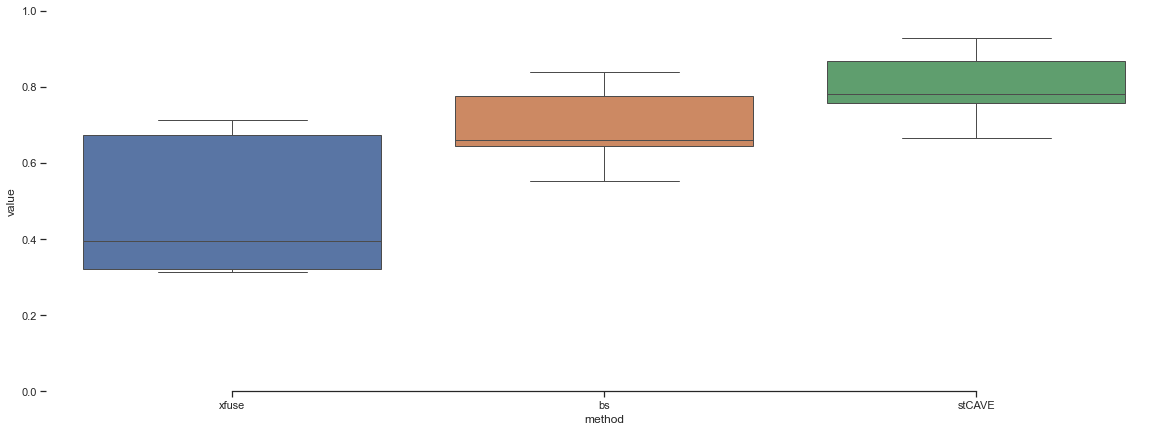

0

In [23]:
data_list_all = [data_1, data_2, data_3]
flag_list_all = [False, True, False]
data_file_all = ['xfuse', 'bs', 'stCAVE']

gene_list = ['MT1G', 'FABP1', 'EPCAM'] + ['CNN1', 'MYH11', 'TAGLN'] + ['PTPRC', 'HLA-DRA', 'CD74']
plot_diff_ksd_all(data_list_all, data_file_all, [2, 2, 2, 3, 3, 3, 6, 6, 6], gene_list, flag_list_all)

# Fig 2f

In [1]:
from postprocess import Numpy2Image as n2i
from postprocess import Result2Csv as r2c
import numpy as np
import pandas as pd

project_name = 'PDAC_A_global_2'
exp_name = 'svae_ari12'
folder_name = f'result/{project_name}/{exp_name}'

grid = 9
spot_num = 428

fea = np.load(f'{folder_name}/infer_subspot.npy')
mean_fea = np.zeros((spot_num, fea.shape[1]))
for i in range(spot_num):
    fea_sub = fea[i * grid :(i + 1) * grid]
    mean_fea[i] = np.mean(fea_sub, axis=0)
    
np.save(f'result/{project_name}/{exp_name}_pc.npy', fea)
pd.DataFrame(fea, columns=[f'PC{i+1}' for i in range(7)]).to_csv(f'result/{project_name}/{exp_name}_pc.csv', index=None)

np.save(f'result/{project_name}/{exp_name}_mean.npy', mean_fea)
pd.DataFrame(mean_fea, columns=[f'PC{i+1}' for i in range(7)]).to_csv(f'result/{project_name}/{exp_name}_mean.csv', index=None)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

folder_name = f'result/{project_name}/{exp_name}'
true_fea = np.load(f'result/{project_name}/label.npy')
position = pd.read_csv(f'data/PDAC_A/colData.csv')
row = position['row'].tolist()
col = position['col'].tolist()

pc_fea = np.load(f'result/{project_name}/{exp_name}_pc.npy')
enhance_position = pd.read_csv(f'data/PDAC_A/filtered_tissue_position_with_center.csv')
row_ = enhance_position['row'].tolist()
col_ = enhance_position['col'].tolist()
fea_pc =  np.load(f'result/{project_name}/{exp_name}_pc.npy')

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


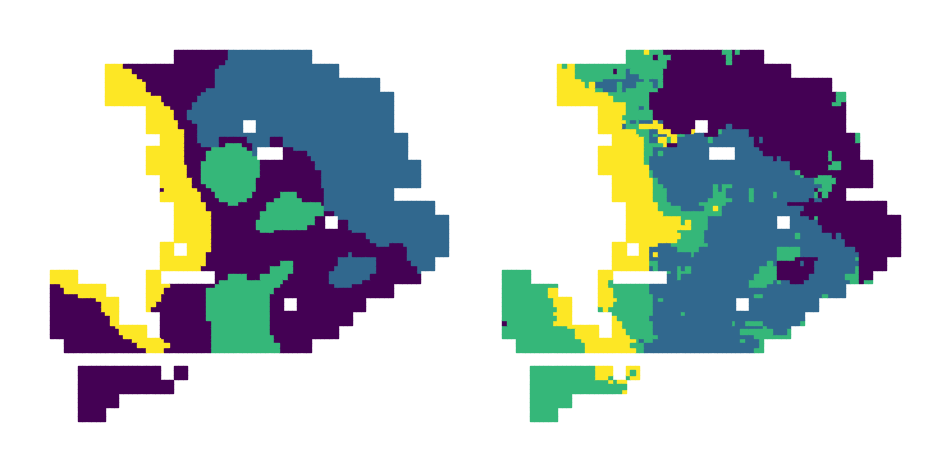

0.4103870089294875


In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)

def map_color(c):
    c_ = [0] * len(c)
    for i in range(len(c)):
        if c[i] == 'Duct':
            c_[i] = 3
        elif c[i] == 'Cancer':
            c_[i] = 1
        elif c[i] == 'Pan':
            c_[i] = 2
    return c_

from sklearn.metrics import adjusted_rand_score as ARI
fea_pc =  np.load(f'result/{project_name}/{exp_name}_pc.npy')
cluster_num = 4
kmeans = KMeans(n_clusters=cluster_num, random_state=0).fit(fea_pc.reshape(fea_pc.shape[0], -1))
f_pc = np.array(kmeans.labels_)

cmp='viridis'
label = pd.read_csv(f'data/PDAC_A/filtered_tissue_position_with_label_4.csv')
all_label = label['label'].tolist()
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.scatter(label['col'], label['row'], s=10,
                    marker='s',
                    c=map_color(all_label))
plt.scatter(col_+ 2*np.mean(col_), row_ , s=10,
                    marker='s',
                    c=f_pc,
                   cmap=cmp)
plt.axis("equal")
plt.axis('off')
plt.savefig(f'../paper/NNfig/Fig2/anno_region_label.pdf')
plt.show()

ours_ari = ARI(all_label, f_pc)
print(ours_ari)

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


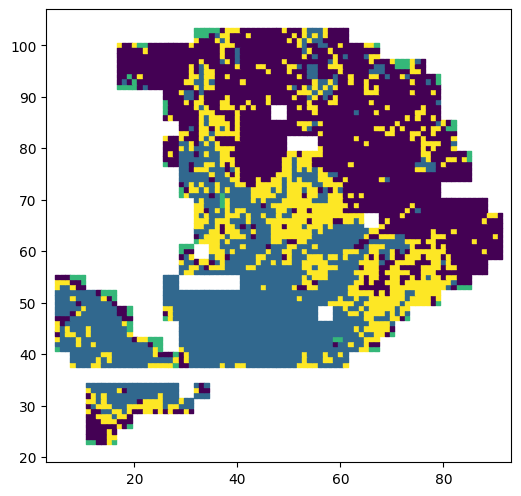

0.19243723803420526


In [4]:
# df_xfuse = pd.read_csv(f'result/{project_name}/pdac_XFuse_SR_deep_2.csv', index_col=0)
df_xfuse = pd.read_csv(f'result/{project_name}/xfuse_log_counts_2.csv', index_col=0)
df_xfuse = df_xfuse.fillna(0)
count_xfuse = df_xfuse.values

pca = PCA(n_components=7)
pca.fit(count_xfuse)
pc = pca.transform(count_xfuse)
xfuse_label = kmeans.fit(pc.reshape(3852, -1)).labels_


order = (pd.read_csv(f'result/{project_name}/pdac_hr_position_xfuse_order.csv', sep=',')['index']-1).tolist()
position_xfuse =  pd.read_csv(f'result/{project_name}/pdac_hr_position_1.csv', index_col=0)
row_xf = position_xfuse['x']
col_xf = position_xfuse['y']

gt_reordered_label_df = label.loc[order]
fig = plt.figure(figsize=(6, 6), dpi=100)
plt.scatter(col_xf, row_xf, s=10,
                    marker='s',
                    c=xfuse_label)
plt.axis("equal")
plt.show()

xf_ari = ARI(map_color(gt_reordered_label_df['label'].tolist()), xfuse_label)
print(xf_ari)

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


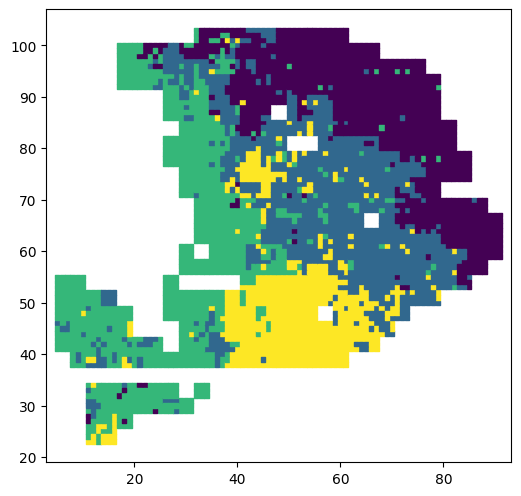

0.2840636681417432


In [5]:
bs = pd.read_csv(f'result/{project_name}/bs_reordered.csv').values
cluster_num = 4
bs_label = KMeans(n_clusters=cluster_num, random_state=0).fit(bs.reshape(bs.shape[0], -1)).labels_

fig = plt.figure(figsize=(6, 6), dpi=100)
plt.scatter(col_, row_, s=10,
                    marker='s',
                    c=bs_label)
plt.axis("equal")
plt.show()

bs_ari = ARI(map_color(all_label), bs_label)
print(bs_ari)

# Fig 2g

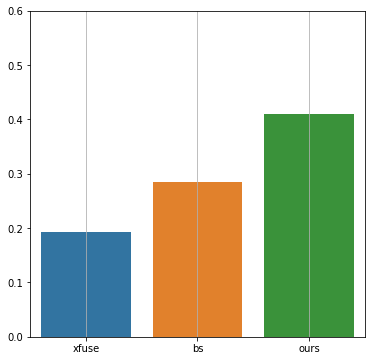

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=['xfuse', 'bs', 'ours'], y=[xf_ari, bs_ari, ours_ari])
ax.set(ylim=(0, 0.6))
ax.xaxis.grid(True)
plt.show()

In [7]:
(ours_ari / bs_ari) - 1

0.4447008011060074